<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

## <div style="text-align: left; background-color:#192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">TABLE OF CONTENTS</div>

* &nbsp; **[Used Libraries](#USED-LIBRARIES)**

* &nbsp; **[Metadata](#METADATA)**

* &nbsp; **[Load and Check Data](#LOAD-AND-CHECK-DATA)**

* &nbsp; **[Data Cleaning](#DATA-CLEANING)**

* &nbsp; **[Data Analysis](#EXPLORATORY-DATA-ANALYSIS)**

* &nbsp; **[K-Means Clustering](#EXPLORATORY-DATA-ANALYSIS)**

* &nbsp; **[Product Recommendation](#EXPLORATORY-DATA-ANALYSIS)**



<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">USED LIBRARIES</div>


*  **Numpy**      : For Mathmatical Operations
*  **Pandas**     : For Data Processing, file reading
*  **Seaborn**    : For Data Visualization
*  **MatplotLib** : For Data Visualization
*  **Plotly**     : For Data Visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import tkinter as tk
from tkinter import ttk


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">METADATA</div>

(From [Superstore Dataset](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final) Data Card)

* Row ID ========> Unique ID for each row.
* Order ID ======> Unique Order ID for each Customer.
* Order Date ====> Order Date of the product.
* Ship Date =====> Shipping Date of the Product.
* Ship Mode =====> Shipping Mode specified by the Customer.
* Customer ID ===> Unique ID to identify each Customer.
* Customer Name => Name of the Customer.
* Segment =======> The segment where the Customer belongs.
* Country =======> Country of residence of the Customer.
* City ==========> City of residence of of the Customer.
* State =========> State of residence of the Customer.
* Postal Code ===> Postal Code of every Customer.
* Region ========> Region where the Customer belong.
* Product ID ====> Unique ID of the Product.
* Category ======> Category of the product ordered.
* Sub-Category ==> Sub-Category of the product ordered.
* Product Name ==> Name of the Product
* Sales =========> Sales of the Product.
* Quantity ======> Quantity of the Product.
* Discount ======> Discount provided.
* Profit ========> Profit/Loss incurred.

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">LOAD AND CHECK DATA</div>

In [2]:
ss_data = pd.read_csv("Superstore-Data.csv")

In [3]:
ss_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
ss_data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [5]:
ss_data.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
5804,5805,CA-2017-113873,11/13/2017,11/19/2017,Standard Class,KE-16420,Katrina Edelman,Corporate,United States,Dallas,...,75220,Central,OFF-ST-10000943,Office Supplies,Storage,Eldon ProFile File 'N Store Portable File Tub ...,61.792,4,0.2,6.1792
4310,4311,CA-2014-125829,11/4/2014,11/11/2014,Standard Class,WB-21850,William Brown,Consumer,United States,Los Angeles,...,90045,West,OFF-BI-10001036,Office Supplies,Binders,Cardinal EasyOpen D-Ring Binders,21.936,3,0.2,8.2260
6645,6646,US-2015-156496,8/10/2015,8/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,Redmond,...,97756,West,OFF-AP-10001469,Office Supplies,Appliances,Fellowes 8 Outlet Superior Workstation Surge P...,133.472,4,0.2,15.0156
8917,8918,US-2016-144057,5/9/2016,5/13/2016,Standard Class,CV-12805,Cynthia Voltz,Corporate,United States,Austin,...,78745,Central,OFF-PA-10004327,Office Supplies,Paper,Xerox 1911,76.640,2,0.2,26.8240


In [6]:
ss_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9983 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## 

* **There are null values found in State column.**
* **There are 2 int64 columns ("Quantity" and "Postal Code")**
* **There are 3 float64 columns ("Sales", "Discount", "Profit")**
* **There are 15 object columns.**
* **We need to change data type for columns: Order Date, Ship Date, Postal Code.**

In [7]:
ss_data[['Sales', 'Profit', 'Quantity', 'Discount']].describe()

,Sales,Profit,Quantity,Discount
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,28.656896,3.789574,0.156203
std,623.245101,234.260108,2.225110,0.206452
min,0.444000,-6599.978000,1.000000,0.000000
25%,17.280000,1.728750,2.000000,0.000000
50%,54.490000,8.666500,3.000000,0.200000
75%,209.940000,29.364000,5.000000,0.200000
max,22638.480000,8399.976000,14.000000,0.800000


In [8]:
ss_data.describe(include='object')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9983,9994,9994,9994,9994,9994
unique,5009,1237,1334,4,793,793,3,1,531,48,4,1862,3,17,1850
top,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">DATA CLEANING</div>

## Check for inconsistencies

In [9]:
ss_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
print(ss_data['Ship Mode'].unique())
print('------------------------------------------------')
print(ss_data['Segment'].unique())
print('------------------------------------------------')
print(ss_data['Category'].unique())
print('------------------------------------------------')
print(ss_data['Sub-Category'].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
------------------------------------------------
['Consumer' 'Corporate' 'Home Office']
------------------------------------------------
['Furniture' 'Office Supplies' 'Technology']
------------------------------------------------
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [11]:
# to ensure that all column names are in lowercase and there is no space between letterws
ss_data.columns = ss_data.columns.str.lower().str.strip()

In [12]:
ss_data.columns

Index(['row id', 'order id', 'order date', 'ship date', 'ship mode',
       'customer id', 'customer name', 'segment', 'country', 'city', 'state',
       'postal code', 'region', 'product id', 'category', 'sub-category',
       'product name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [13]:
# make all data are lowercase and there is no space
for col in ss_data.select_dtypes(include=['object']).columns:
    ss_data[col] = ss_data[col].str.lower().str.strip()  

In [14]:
print(ss_data[ss_data['sales'] < 0])

Empty DataFrame
Columns: [row id, order id, order date, ship date, ship mode, customer id, customer name, segment, country, city, state, postal code, region, product id, category, sub-category, product name, sales, quantity, discount, profit]
Index: []

[0 rows x 21 columns]


## Missing Data

In [15]:
ss_data.isnull().sum()

row id            0
order id          0
order date        0
ship date         0
ship mode         0
customer id       0
customer name     0
segment           0
country           0
city              0
state            11
postal code       0
region            0
product id        0
category          0
sub-category      0
product name      0
sales             0
quantity          0
discount          0
profit            0
dtype: int64

In [16]:
ss_data[ss_data['state'].isnull()]

,row id,order id,order date,ship date,ship mode,customer id,customer name,segment,country,city,...,postal code,region,product id,category,sub-category,product name,sales,quantity,discount,profit
2234,2235,ca-2017-104066,12/5/2017,12/10/2017,standard class,qj-19255,quincy jones,corporate,united states,burlington,...,5408,east,tec-ac-10001013,technology,accessories,logitech clearchat comfort/usb headset h390,205.03,7,0.0,67.6599
5274,5275,ca-2015-162887,11/7/2015,11/9/2015,second class,sv-20785,stewart visinsky,consumer,united states,burlington,...,5408,east,fur-ch-10000595,furniture,chairs,safco contoured stacking chairs,715.20,3,0.0,178.8000
8798,8799,us-2016-150140,4/6/2016,4/10/2016,standard class,vm-21685,valerie mitchum,home office,united states,burlington,...,5408,east,tec-ph-10002555,technology,phones,nortel meridian m5316 digital phone,1294.75,5,0.0,336.6350
9146,9147,us-2016-165505,1/23/2016,1/27/2016,standard class,cb-12535,claudia bergmann,corporate,united states,burlington,...,5408,east,tec-ac-10002926,technology,accessories,logitech wireless marathon mouse m705,99.98,2,0.0,42.9914
9147,9148,us-2016-165505,1/23/2016,1/27/2016,standard class,cb-12535,claudia bergmann,corporate,united states,burlington,...,5408,east,off-ar-10003477,office supplies,art,4009 highlighters,8.04,6,0.0,2.7336
9148,9149,us-2016-165505,1/23/2016,1/27/2016,standard class,cb-12535,claudia bergmann,corporate,united states,burlington,...,5408,east,off-st-10001526,office supplies,storage,iceberg mobile mega data/printer cart,1564.29,13,0.0,406.7154
9386,9387,us-2017-127292,1/19/2017,1/23/2017,standard class,rm-19375,raymond messe,consumer,united states,burlington,...,5408,east,off-pa-10000157,office supplies,paper,xerox 191,79.92,4,0.0,37.5624
9387,9388,us-2017-127292,1/19/2017,1/23/2017,standard class,rm-19375,raymond messe,consumer,united states,burlington,...,5408,east,off-pa-10001970,office supplies,paper,xerox 1881,12.28,1,0.0,5.7716
9388,9389,us-2017-127292,1/19/2017,1/23/2017,standard class,rm-19375,raymond messe,consumer,united states,burlington,...,5408,east,off-ap-10000828,office supplies,appliances,avanti 4.4 cu. ft. refrigerator,542.94,3,0.0,152.0232
9389,9390,us-2017-127292,1/19/2017,1/23/2017,standard class,rm-19375,raymond messe,consumer,united states,burlington,...,5408,east,off-en-10001509,office supplies,envelopes,poly string tie envelopes,2.04,1,0.0,0.9588


In [17]:
ss_data['state'] = ss_data['state'].fillna("vermont") # 05408 is Postal code for Vermont State 

In [18]:
ss_data.isna().sum()

row id           0
order id         0
order date       0
ship date        0
ship mode        0
customer id      0
customer name    0
segment          0
country          0
city             0
state            0
postal code      0
region           0
product id       0
category         0
sub-category     0
product name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64

## Duplicate Data

In [19]:
ss_data.duplicated().sum()

0

In [20]:
ss_data.drop(columns=['row id'], inplace=True)

In [21]:
ss_data.duplicated().sum()

1

In [22]:
ss_data[ss_data.duplicated(keep=False)]

,order id,order date,ship date,ship mode,customer id,customer name,segment,country,city,state,postal code,region,product id,category,sub-category,product name,sales,quantity,discount,profit
3405,us-2014-150119,4/23/2014,4/27/2014,standard class,lb-16795,laurel beltran,home office,united states,columbus,ohio,43229,east,fur-ch-10002965,furniture,chairs,global leather highback executive chair with p...,281.372,2,0.3,-12.0588
3406,us-2014-150119,4/23/2014,4/27/2014,standard class,lb-16795,laurel beltran,home office,united states,columbus,ohio,43229,east,fur-ch-10002965,furniture,chairs,global leather highback executive chair with p...,281.372,2,0.3,-12.0588


In [23]:
ss_data = ss_data.drop_duplicates()

## Outliers

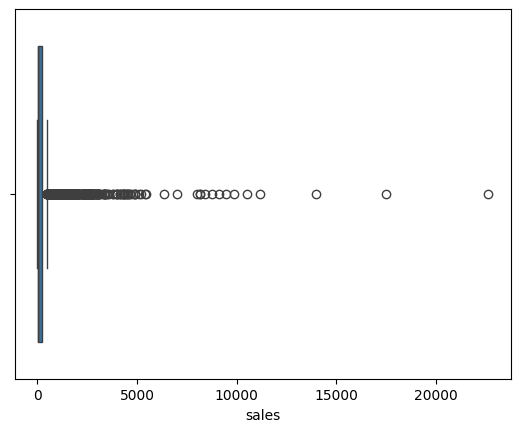

In [24]:
sns.boxplot(x=ss_data['sales'])
plt.show()

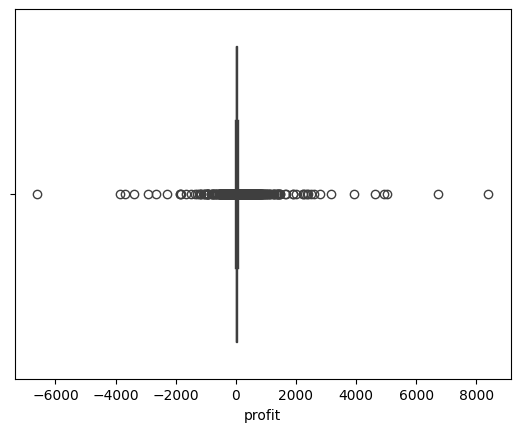

In [25]:
sns.boxplot(x=ss_data['profit'])
plt.show()

## Feature Engineering

In [26]:
ss_data['order date'] = pd.to_datetime(ss_data['order date'], format='%m/%d/%Y')
ss_data['ship date'] = pd.to_datetime(ss_data['ship date'], format='%m/%d/%Y')
ss_data['postal code'] = ss_data['postal code'].astype(str)

In [27]:
# Create a new feature: Days to Ship
ss_data['days to ship'] = (ss_data['ship date'] - ss_data['order date']).dt.days
ss_data.head()

,order id,order date,ship date,ship mode,customer id,customer name,segment,country,city,state,...,region,product id,category,sub-category,product name,sales,quantity,discount,profit,days to ship
0,ca-2016-152156,2016-11-08,2016-11-11,second class,cg-12520,claire gute,consumer,united states,henderson,kentucky,...,south,fur-bo-10001798,furniture,bookcases,bush somerset collection bookcase,261.9600,2,0.00,41.9136,3
1,ca-2016-152156,2016-11-08,2016-11-11,second class,cg-12520,claire gute,consumer,united states,henderson,kentucky,...,south,fur-ch-10000454,furniture,chairs,"hon deluxe fabric upholstered stacking chairs,...",731.9400,3,0.00,219.5820,3
2,ca-2016-138688,2016-06-12,2016-06-16,second class,dv-13045,darrin van huff,corporate,united states,los angeles,california,...,west,off-la-10000240,office supplies,labels,self-adhesive address labels for typewriters b...,14.6200,2,0.00,6.8714,4
3,us-2015-108966,2015-10-11,2015-10-18,standard class,so-20335,sean o'donnell,consumer,united states,fort lauderdale,florida,...,south,fur-ta-10000577,furniture,tables,bretford cr4500 series slim rectangular table,957.5775,5,0.45,-383.0310,7
4,us-2015-108966,2015-10-11,2015-10-18,standard class,so-20335,sean o'donnell,consumer,united states,fort lauderdale,florida,...,south,off-st-10000760,office supplies,storage,eldon fold 'n roll cart system,22.3680,2,0.20,2.5164,7


## Save Cleaned Data

In [ ]:
ss_data.to_csv('cleande_Superstore_data.csv', index=False)


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">Data Analysis</div>

## Check Correlation

C:\Users\user\AppData\Local\Temp\ipykernel_14424\2419714775.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ss_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


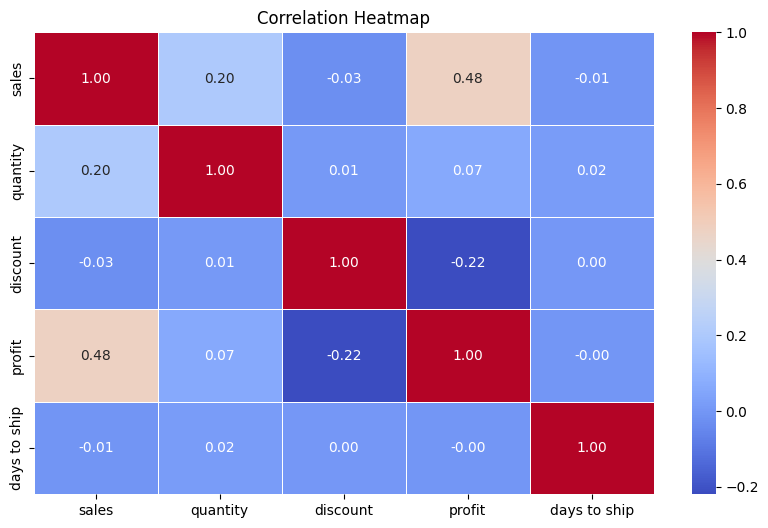

In [29]:
# Heatmap to check correlation between numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(ss_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


## How many years dataset covers

In [30]:
# Convert to datetime format
ss_data['order date'] = pd.to_datetime(ss_data['order date'])

# Find the range of years
start_year = ss_data['order date'].dt.year.min()
end_year = ss_data['order date'].dt.year.max()

# Get the number of unique years
num_years = ss_data['order date'].dt.year.nunique()

print(f"The data spans from {start_year} to {end_year}, covering {num_years} years.")

The data spans from 2014 to 2017, covering 4 years.


## What is the total number of customers?

In [31]:
ss_data['customer id'].nunique()

793

## What is the total number of orders?

In [32]:
ss_data['order id'].count()

9993

## What is the total number of sold items?

In [33]:
ss_data['quantity'].sum()

37871

## What is the total number of Sales?

In [34]:
sales_sum = ss_data['sales'].sum()
print(round(sales_sum, 2), '$')

2296919.49 $


## What is the total number of profit?

In [35]:
profit_sum = ss_data['profit'].sum()
print(round(profit_sum, 2), '$')

286409.08 $


## what is the profit ratio

In [36]:

profit_ratio = (ss_data['profit'].sum() / ss_data['sales'].sum())*100
print(round(profit_ratio, 2),'%')

12.47 %


## What is Avg discount

In [37]:
Avg_disc = ss_data['discount'].mean()*100
print(round(Avg_disc, 2), '%')

15.62 %


## Sales & profit by region

In [38]:
sales_region = ss_data.groupby('region')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False).round(2)
print(sales_region)

             sales     profit
region                       
west     725457.82  108418.45
east     678499.87   91534.84
central  501239.89   39706.36
south    391721.90   46749.43


## Sales & profit by state

In [39]:
sales_state = ss_data.groupby('state')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False).round(2)
print(sales_state)

                          sales    profit
state                                    
california            457687.63  76381.39
new york              310876.27  74038.55
texas                 170188.05 -25729.36
washington            138641.27  33402.65
pennsylvania          116511.91 -15559.96
florida                89473.71  -3399.30
illinois               80166.10 -12607.89
ohio                   77976.76 -16959.32
michigan               76269.61  24463.19
virginia               70636.72  18597.95
north carolina         55603.16  -7490.91
indiana                53555.36  18382.94
georgia                49095.84  16250.04
kentucky               36591.75  11199.70
new jersey             35764.31   9772.91
arizona                35282.00  -3427.92
wisconsin              32114.61   8401.80
colorado               32108.12  -6527.86
tennessee              30661.87  -5341.69
minnesota              29863.15  10823.19
massachusetts          28634.43   6785.50
delaware               27451.07   

## Sales & profit by city

In [40]:
sales_city = ss_data.groupby('city')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False).round(2)
print(sales_city)

                   sales    profit
city                              
new york city  256368.16  62036.98
los angeles    175851.34  30440.76
seattle        119540.74  29156.10
san francisco  112669.09  17507.39
philadelphia   109077.01 -13837.77
...                  ...       ...
ormond beach        2.81     -1.97
pensacola           2.21     -1.48
jupiter             2.06      0.15
elyria              1.82     -1.40
abilene             1.39     -3.76

[531 rows x 2 columns]


## Sales & profit by segment

In [41]:
sales_segment = ss_data.groupby('segment')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False).round(2)
print(sales_segment)

                  sales     profit
segment                           
consumer     1161401.34  134119.21
corporate     706146.37   91979.13
home office   429371.78   60310.74


## Sales & profit by ship mode

In [42]:
sales_ship_mode = ss_data.groupby('ship mode')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False).round(2)
print(sales_ship_mode)

                     sales     profit
ship mode                            
standard class  1357934.37  164100.85
second class     459193.57   57446.64
first class      351428.42   48969.84
same day         128363.12   15891.76


## Sales & profit by category

In [43]:
sales_category = ss_data.groupby('category')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False).round(2)
print(sales_category)

                     sales     profit
category                             
technology       836154.03  145454.95
furniture        741718.42   18463.33
office supplies  719047.03  122490.80


## Sales & profit by sub category

In [44]:
sales_sub_category = ss_data.groupby('sub-category')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False).round(2)
print(sales_sub_category)

                  sales    profit
sub-category                     
phones        330007.05  44515.73
chairs        328167.73  26602.23
storage       223843.61  21278.83
tables        206965.53 -17725.48
binders       203412.73  30221.76
machines      189238.63   3384.76
accessories   167380.32  41936.64
copiers       149528.03  55617.82
bookcases     114880.00  -3472.56
appliances    107532.16  18138.01
furnishings    91705.16  13059.14
paper          78479.21  34053.57
supplies       46673.54  -1189.10
art            27118.79   6527.79
envelopes      16476.40   6964.18
labels         12486.31   5546.25
fasteners       3024.28    949.52


## Sales & profit by product name

In [45]:
sales_product_name = ss_data.groupby('product name')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False).round(2)
print(sales_product_name)

                                                       sales    profit
product name                                                          
canon imageclass 2200 advanced copier               61599.82  25199.93
fellowes pb500 electric punch plastic comb bind...  27453.38   7753.04
cisco telepresence system ex90 videoconferencin...  22638.48  -1811.08
hon 5400 series task chairs for big and tall        21870.58      0.00
gbc docubind tl300 electric binding system          19823.48   2233.51
...                                                      ...       ...
avery hi-liter pen style six-color fluorescent set      7.70      3.16
grip seal envelopes                                     7.07      2.39
xerox 20                                                6.48      3.11
avery 5                                                 5.76      2.82
eureka disposable bags for sanitaire vibra groo...      1.62     -4.47

[1850 rows x 2 columns]


## Sales & profit by customer name

In [46]:
sales_customer_name = ss_data.groupby('customer name')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False).round(2)
print(sales_customer_name)

                    sales   profit
customer name                     
sean miller      25043.05 -1980.74
tamara chand     19052.22  8981.32
raymond buch     15117.34  6976.10
tom ashbrook     14595.62  4703.79
adrian barton    14473.57  5444.81
...                   ...      ...
roy skaria          22.33     9.58
mitch gastineau     16.74    -1.25
carl jackson        16.52     1.65
lela donovan         5.30     0.46
thais sissman        4.83    -3.32

[793 rows x 2 columns]


## Sales & profit overtime (m\y)

                  sales      profit
order date                         
2014-01      14236.8950   2450.1907
2014-02       4519.8920    862.3084
2014-03      55691.0090    498.7299
2014-04      28013.9730   3500.8940
2014-05      23648.2870   2738.7096
2014-06      34595.1276   4976.5244
2014-07      33946.3930   -841.4826
2014-08      27909.4685   5318.1050
2014-09      81777.3508   8328.0994
2014-10      31453.3930   3448.2573
2014-11      78628.7167   9292.1269
2014-12      69545.6205   8983.5699
2015-01      18174.0756  -3281.0070
2015-02      11951.4110   2813.8508
2015-03      38726.2520   9732.0978
2015-04      34195.2085   4187.4962
2015-05      30131.6865   4667.8690
2015-06      24797.2920   3335.5572
2015-07      28765.3250   3288.6483
2015-08      36898.3322   5355.8084
2015-09      64595.9180   8209.1627
2015-10      31404.9235   2817.3660
2015-11      75972.5635  12474.7884
2015-12      74919.5212   8016.9659
2016-01      18542.4910   2824.8233
2016-02      22978.8150   50

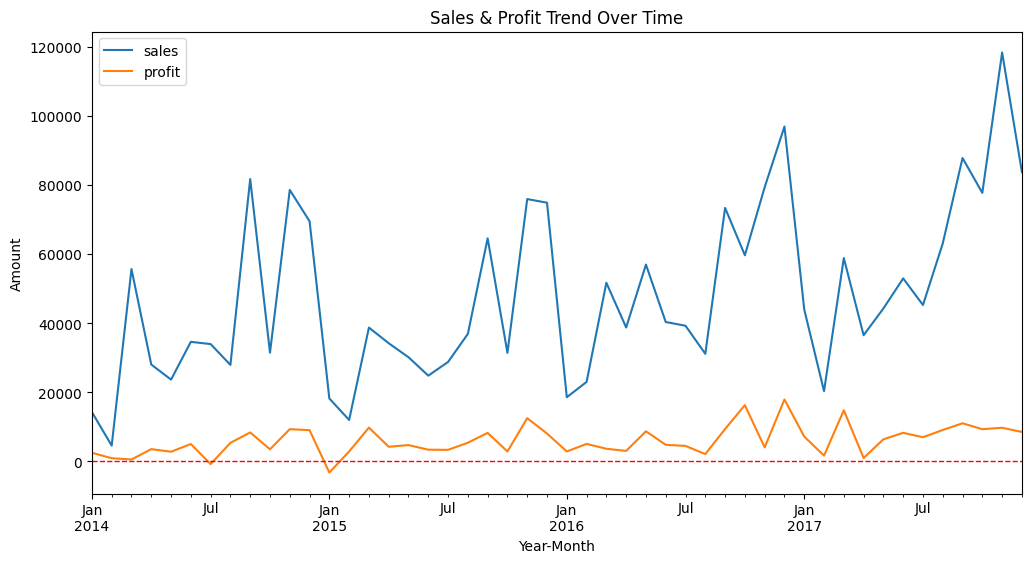

In [47]:
sales_profit_trend = ss_data.groupby(ss_data['order date'].dt.to_period('M'))[['sales', 'profit']].sum()
print(sales_profit_trend)
# Plot
sales_profit_trend.plot(kind='line', figsize=(12, 6))
# Add a horizontal line at zero to highlight negative profits
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Sales & Profit Trend Over Time")
plt.ylabel("Amount")
plt.xlabel("Year-Month")
plt.show()


## Sales & profit over the year (seasonal trend)

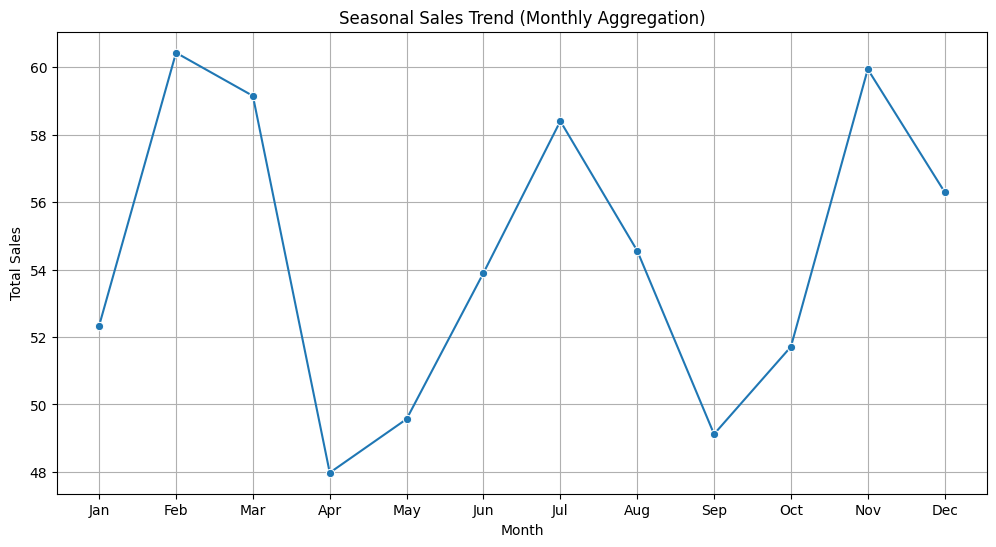

In [48]:
# Extract Month (1-12)
ss_data['month'] = ss_data['order date'].dt.month

# Aggregate total sales per month across all years
seasonal_sales_trend = ss_data.groupby('month')[['sales']].median()

# Plot the seasonal trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_sales_trend, x=seasonal_sales_trend.index, y='sales', marker='o')

# Formatting
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.title("Seasonal Sales Trend (Monthly Aggregation)")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.grid(True)
plt.show()


## Impact of Shipping Delays on Sales 

                    sales
days to ship             
0             124907.6910
1              67975.3312
2             368465.8300
3             204659.5988
4             631565.6333
5             494357.0837
6             240290.5698
7             164697.7505


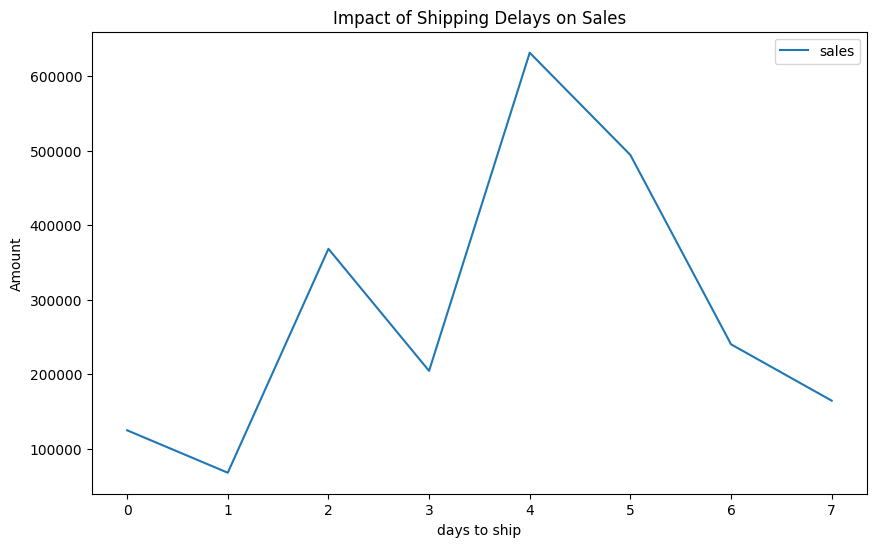

In [49]:
shipping_delay_impact = ss_data.groupby('days to ship')[['sales']].sum()
print(shipping_delay_impact)

# Visualize the impact of shipping delays on sales and profit
shipping_delay_impact.plot(kind='line', figsize=(10, 6))
plt.title("Impact of Shipping Delays on Sales")
plt.ylabel("Amount")
plt.show()

## seasonal trend in Sales by Region

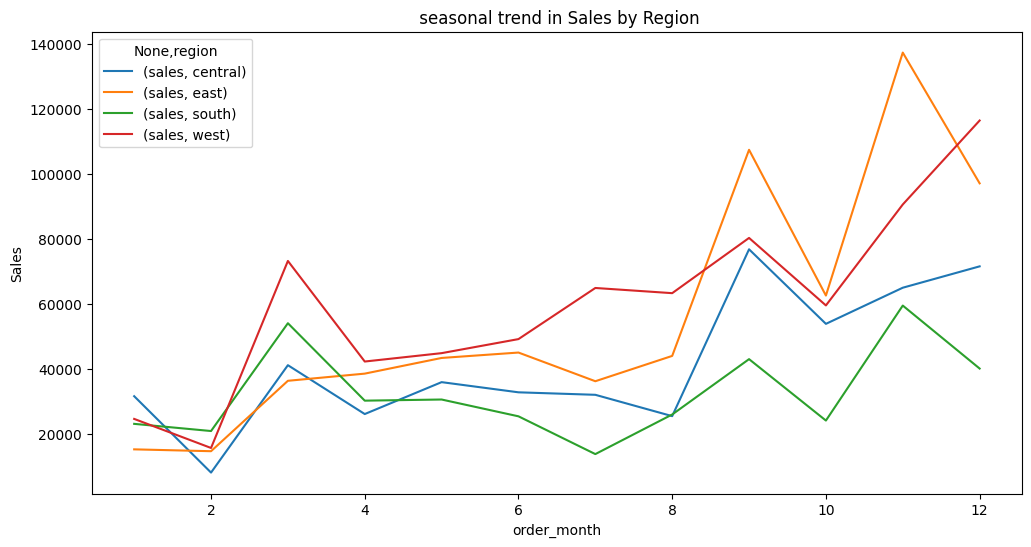

In [50]:
# Extract month and year for seasonal analysis
ss_data['order_month'] =ss_data['order date'].dt.month
ss_data['order_year'] =ss_data['order date'].dt.year

# Group by region and month to see seasonal patterns
seasonal_sales =ss_data.groupby(['region', 'order_month'])[['sales']].sum()

# Visualize seasonal sales by region
seasonal_sales.unstack(level=0).plot(kind='line', figsize=(12, 6), title=" seasonal trend in Sales by Region")
plt.ylabel("Sales")
plt.show()


## Impact of Discounts on Sales & Profitability

<Figure size 1000x600 with 0 Axes>

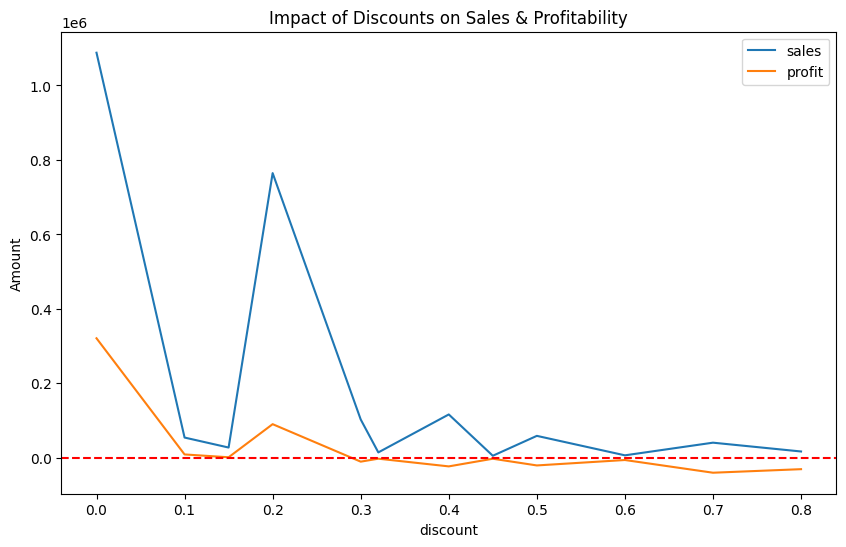

In [51]:
discount_analysis = ss_data.groupby('discount')[['sales', 'profit']].sum()

plt.figure(figsize=(10, 6))

# Plot sales and profit against discount
discount_analysis.plot(kind='line', figsize=(10, 6))

plt.axhline(0, color='red', linestyle='--')
plt.title("Impact of Discounts on Sales & Profitability")
plt.ylabel("Amount")
plt.show()


## profit Over Years by category

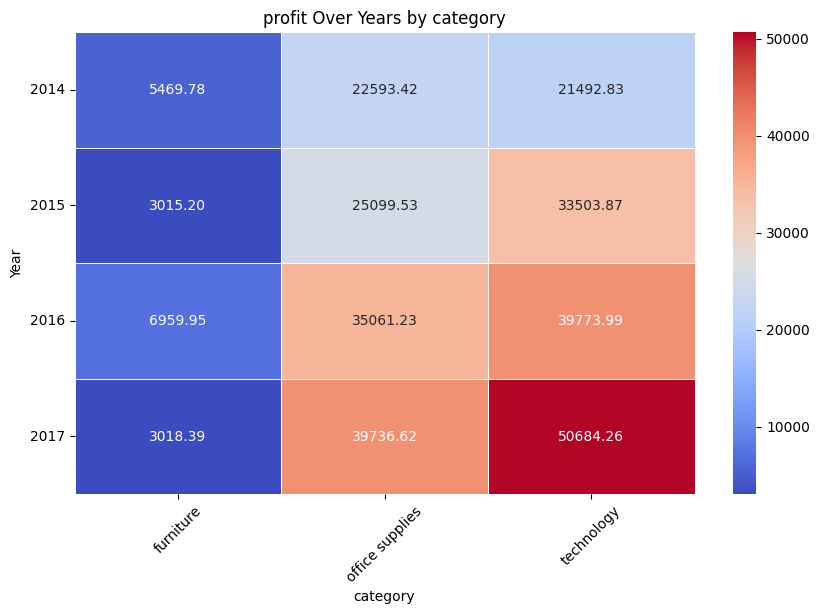

In [52]:
# Extract Year
ss_data['Year'] = ss_data['order date'].dt.year

# Grouping by Year and category
profit_overtime = ss_data.groupby(['Year', 'category'])[['profit']].sum().reset_index()

# Pivot to format for heatmap
profit_pivot = profit_overtime.pivot(index='Year', columns='category', values='profit')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(profit_pivot, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

# Formatting
plt.title("profit Over Years by category")
plt.xlabel("category")
plt.ylabel("Year")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


## profit Over Years by sub category

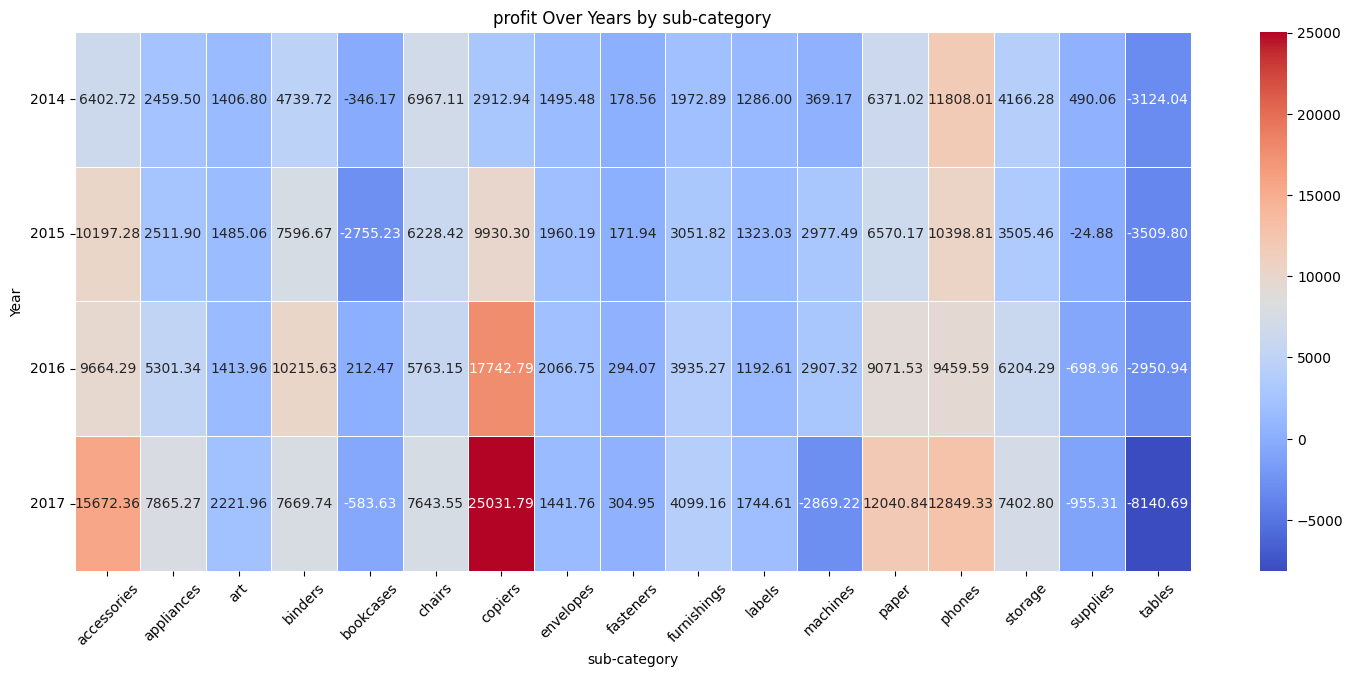

In [53]:
# Extract Year
ss_data['Year'] = ss_data['order date'].dt.year

# Grouping by Year and sub-category
profit_overtime = ss_data.groupby(['Year', 'sub-category'])[['profit']].sum().reset_index()

# Pivot to format for heatmap
profit_pivot = profit_overtime.pivot(index='Year', columns='sub-category', values='profit')

# Plot heatmap
plt.figure(figsize=(18, 7))
sns.heatmap(profit_pivot, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

# Formatting
plt.title("profit Over Years by sub-category")
plt.xlabel("sub-category")
plt.ylabel("Year")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">Model Building</div>

In [54]:
# Groping median Sales per Customer and customer id
customer_sales = ss_data.groupby('customer id', as_index=False)['sales'].median()

In [55]:
# Standardize Sales Data
scaler = MinMaxScaler()
customer_sales['sales_scaled'] = scaler.fit_transform(customer_sales[['sales']])

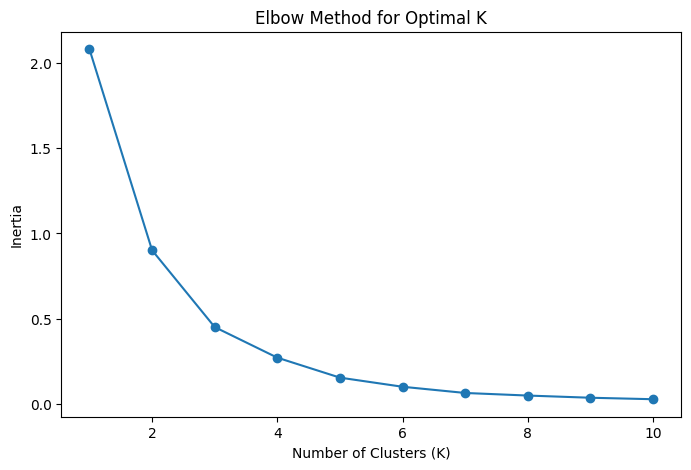

In [56]:
# Find Optimal Number of Clusters using Elbow Method
inertia = []
k_range = range(1, 11)  # Trying different K values from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(customer_sales[['sales_scaled']])
    inertia.append(kmeans.inertia_)

# Plot Elbow Method Graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [57]:
# Apply K-Means Clustering with Optimal K (Choosed based on Elbow Method)
optimal_k = 4 
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer_sales['cluster'] = kmeans.fit_predict(customer_sales[['sales_scaled']])

In [58]:
# Merge Cluster Labels Back into Original Dataset
ss_data = ss_data.merge(customer_sales[['customer id', 'cluster']], on='customer id', how='left')

In [59]:
# Evaluating clustering
silhouette_avg = silhouette_score(customer_sales[['sales_scaled']], customer_sales['cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.68


In [60]:
cluster_summary = customer_sales.groupby('cluster')['sales'].agg(['median', 'sum']).sort_values(by='sum')
print(cluster_summary)


           median         sum
cluster                      
3        1919.976   1919.9760
1         863.880   2464.6360
2         145.764  24719.1583
0          46.896  31938.6461


## Product Recommendation

In [61]:
# Function to recommend products for a user based on their cluster
def recommend_for_user(customer_id, top_n=5):
    if customer_id not in ss_data['customer id'].values:
        return ["Customer not found."]

    # Find the cluster of the user
    user_cluster = ss_data.loc[ss_data['customer id'] == customer_id, 'cluster'].iloc[0]

    # Get all users in the same cluster
    cluster_users = ss_data.loc[ss_data['cluster'] == user_cluster, 'customer id'].unique()

    # Get product purchase history in this cluster
    cluster_purchases = ss_data.loc[ss_data['customer id'].isin(cluster_users), 'product name']

    if cluster_purchases.empty:
        return ["No purchase history available for this cluster."]

    # Find the most popular products in this cluster
    top_products = cluster_purchases.value_counts().index.tolist()

    # Find products the target user has already purchased
    user_purchases = ss_data.loc[ss_data['customer id'] == customer_id, 'product name'].unique()

    # Recommend new products (popular in cluster but NOT bought by user)
    recommendations = [product for product in top_products if product not in user_purchases]

    return recommendations[:top_n] if recommendations else ["No new recommendations available."]



In [62]:
# Example usage
customer_id = "dv-13045"
recommended_products = recommend_for_user(customer_id)
print("Recommended products for customer", customer_id, ":", recommended_products)

Recommended products for customer dv-13045 : ['staple envelope', 'staples', 'easy-staple paper', 'staples in misc. colors', 'storex dura pro binders']


In [80]:
# GUI Application
def show_recommendations():
    customer_id = entry_customer_id.get()
    recommendations = recommend_for_user(customer_id)
    recommendations_text.set("\n".join(recommendations))

# Create the main window
root = tk.Tk()
root.title("Product Recommendation System")
root.geometry("500x400")


# Label and entry for Customer ID 
tk.Label(root, text="Enter Customer ID : ").pack(pady=5)
entry_customer_id = tk.Entry(root)
entry_customer_id.pack(pady=5)

# Button to get recommendations
tk.Button(root, text="Get Recommendations", command=show_recommendations).pack(pady=10)

# Label to display recommendations
recommendations_text = tk.StringVar()
label_recommendations = tk.Label(root, textvariable=recommendations_text, justify="left")
label_recommendations.pack(pady=10)

# Run the application
root.mainloop()
